In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [24]:
#Implementing K Means Clustering (Unsupervised Algorithm)
class CustomKmeans():

  def __init__(self, k, max_iterations):
    #Parameter k is the number of clusters
    self.k = k
    self.max_epochs = max_iterations
  
  def predict(self, X):
    self.n, self.features = X.shape

    #Randomly initializing cluster centers
    centroids = self.initialize_centroids(X)
    
    for i in range(self.max_epochs):
      #Creating clusters using randomly initialized centroids
      clusters = self.create_cluster(X, centroids)
      centroids_initial = centroids

      #Optimizing by updating the centroids of clusters
      centroids_new = self.update_centroids(X, clusters)

      #Calculating the difference between the centroids before and after optimization
      difference = centroids_new - centroids_initial

      #Terminating model optimization when no updates are made on centroids
      if not difference.any():
        print("Exit condition satisfied!")
        break

      #Predicting the cluster labels for given data points
      y_out = self.assign_cluster(clusters)

      return y_out 

  def initialize_centroids(self, X):
    centroids = np.zeros((self.k, self.features))

    np.random.seed(72)

    #Randomly initializing centroids to each cluster, from the given datapoints 
    for c in range(self.k):
            centroid_index = np.random.choice(range(self.n))
            centroid = X[centroid_index]
            centroids[c] = centroid

    return centroids


  def create_cluster(self, X, centroids):
    clusters = [[] for _ in range(self.k)]

    #Assigning data points to the cluster whose centroid the point is closest to. 
    for index,x in enumerate(X):
      #Calculating euclidean distance between each point and the centroids
      distance = np.sqrt(np.sum((x - centroids) ** 2, axis=1))
      closest_centroid = np.argmin(distance)
      clusters[closest_centroid].append(index)

    return clusters

  def update_centroids(self, X, clusters):
    centroids = np.zeros((self.k, self.features))
    #Updating the centroids to be mean of each of the created clusters
    for index, c in enumerate(clusters):
      centroid_updated = np.mean(X[c], axis=0)
      centroids[index] = centroid_updated

    return centroids

  def assign_cluster(self, clusters):
  #Assigning a label to each data point based on its cluster
    y_pred = np.empty(self.n)

    for index, c in enumerate(clusters):
      for sample in c:
        y_pred[sample] = index

    return y_pred
    

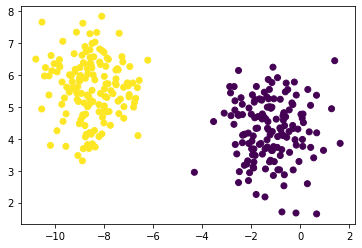

In [47]:
X, Y = make_blobs(centers=2, n_samples=300, n_features=2, random_state=7)

model = CustomKmeans(2, max_iterations=1000)
y_pred = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
